# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [40]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

class linearRegression:
    def __init__(self,learning_rates,itr):
        self.lr = learning_rates
        self.itr = itr
        
    def fit (self, X_train, Y_train):
        rows, cols = X_train.shape
        Y_train = Y_train.reshape(-1,1)

        self.weights = np.zeros(cols,1)
        self.bias = np.zeros(1,1)

        for i in range(itr):
            delta = -(Y_train - np.dot(X_train,self.weights)-self.bias)/n_samples
            dw= np.dot(X_train.T,delta)
            db= np.sum(delta).reshape(1,1)

            #update weights and biases
            self.weights-= self.lr * dw
            self.bias-= self.lr* db

    def predict(self, X_test):
        y_predicted = np.dot(X_test,self.weights)+self.bias
        print(self.weights, self.bias)
        return y_predicted


        
    

## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


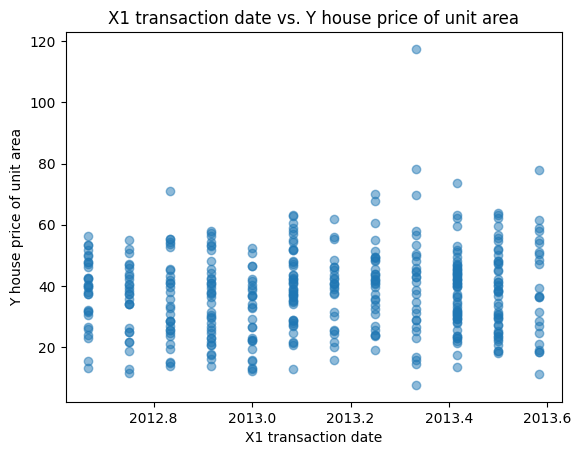

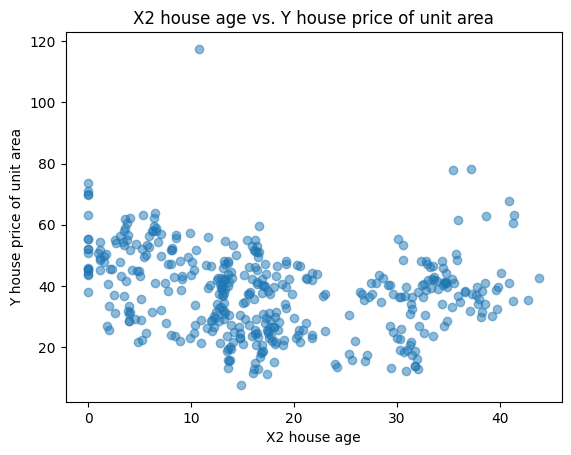

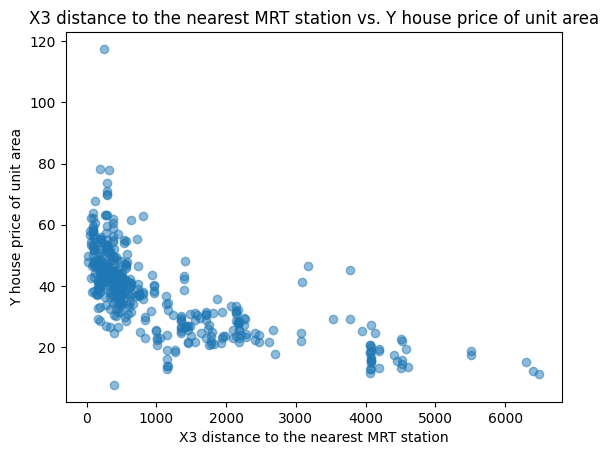

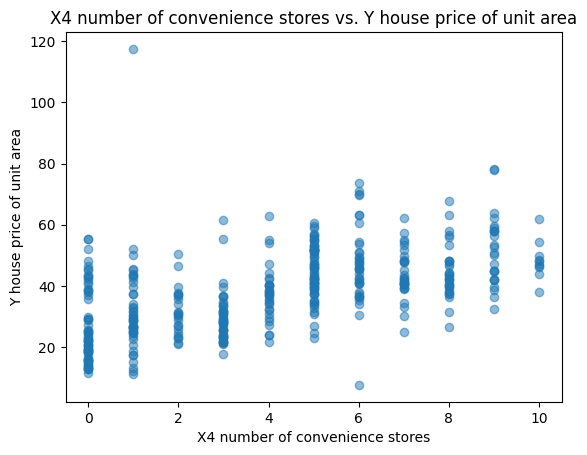

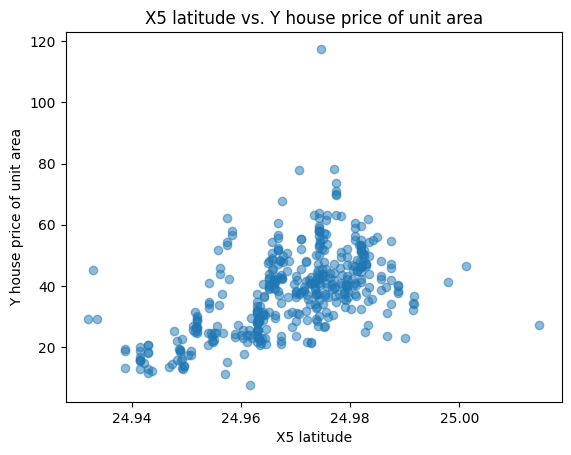

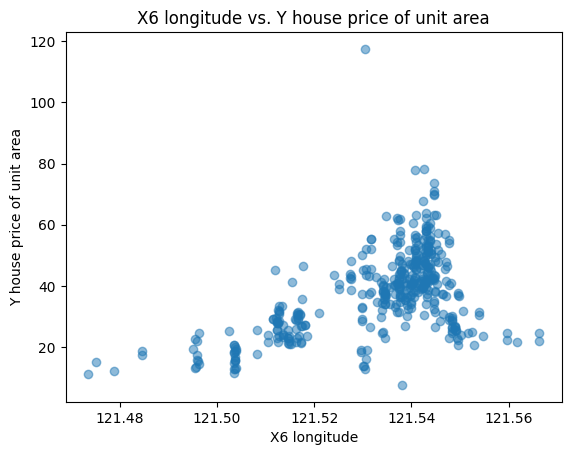

Custom Model MSE: 89.36869711028754
Custom Model R2: 0.43658125985133134
Sklearn Model MSE: 75.92983261247554
Sklearn Model R2: 0.5213056471280291
Tuned Model MSE: 89.57477780355542
Tuned Model R2: 0.43528203844244506


In [32]:

class linearRegression:
    def __init__(self,learning_rates,itr,decay):
        self.lr = learning_rates
        self.itr = itr
        self.decay = decay
        
    def fit (self, X_train, Y_train):
        rows, cols = X_train.shape
        Y_train = Y_train.values.reshape(-1,1)

        self.weights=np.random.randn(cols,1)/np.sqrt(cols)
        self.bias= np.random.randn(1,1)

        for i in range(self.itr):
            delta = -(Y_train - np.dot(X_train,self.weights)-self.bias)/rows
            dw= np.dot(X_train.T,delta)
            db= np.sum(delta).reshape(1,1)

            #update weights and biases
            self.weights-= self.lr * dw
            self.bias-= self.lr* db

        self.lr *= 1 / (1 + self.decay * i)

    def predict(self, X_test):
        y_predicted = np.dot(X_test,self.weights)+self.bias
        
        return y_predicted




import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/krish/OneDrive - IIT Kanpur/Desktop/Visual code/Voice Morph companion Summer project/Week 1_Krishna Agrawal/ML Assignment/Real estate.csv")
print(df.isnull().sum())

last_column = df.columns[-1]
for column in df.columns[1:-1]:
    plt.scatter(df[column], df[last_column], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel(last_column)
    plt.title(f'{column} vs. {last_column}')
    plt.show()

df.drop(df.columns[[1, 4]], axis=1, inplace=True)




# Step 5: Split the dataset into train and test data
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Step 7: Fit the training data into the model created in question 1 and predict the testing data
# Assuming you have already defined and trained your model
lr = linearRegression(0.01,1000,0.001)
fit = lr.fit(X_train_normalized, y_train)
y_pred = lr.predict(X_test_normalized)




# Step 8: Evaluate the performance of your model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Custom Model MSE:", mse)
print("Custom Model R2:", r2)

# Step 9: Fit the training data into the models provided by sklearn.linear_model
sklearn_model = LinearRegression()
sklearn_model.fit(X_train_normalized, y_train)
y_pred_sklearn = sklearn_model.predict(X_test_normalized)

# Step 10: Evaluate the performance of sklearn models
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)
print("Sklearn Model MSE:", mse_sklearn)
print("Sklearn Model R2:", r2_sklearn)

# Step 11: Tune hyperparameters of your model (if applicable)

# Example of tuning hyperparameters
lr_tun = linearRegression(0.001,10000,0.0001)
lr_tun.fit(X_train_normalized, y_train)
y_pred_tuned = lr_tun.predict(X_test_normalized)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
print("Tuned Model MSE:", mse_tuned)
print("Tuned Model R2:", r2_tuned)


# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load breast cancer dataset
df = load_breast_cancer()
X = df.data
y = df.target

# Normalize the X data using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.25, random_state=42)



5. Write code for the sigmoid function and Logistic regression.


In [29]:
import numpy as np

def sigmoid(z):
    return 1 / ( 1 + np.exp(-z))
        

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

class LgisticRegression:
    def __init__(self, learning_rate, epochs):
      #Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights=np.random.randn(n_features,1)/np.sqrt(n_features)
        self.bias= np.random.randn(1,1)

        #Implement the GD algortihm
        for _ in range(self.epochs):
            z = np.dot(X,self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
      #Write the predict function
        y_pred = np.dot(X,self.weights)+self.bias

        for i in range(len(y_pred)):
            if y_pred[i]<= 0.5:
                y_pred[i] = 0
            else:
                y_pred[i] = 1   
        return y_pred

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [52]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# Load breast cancer dataset
df = load_breast_cancer()
X = df.data
y = df.target

# Normalize the X data using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.25, random_state=42)

logreg = LgisticRegression(0.01,1000)

logreg.fit(X_train, y_train)

# Predict the output
y_pred = logreg.predict(X_test)

# Evaluate the output
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test,y_pred))

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred_skicit = classifier.predict(X_test)
print(accuracy_score(y_test,y_pred_skicit))

# Initialize lists to store accuracy scores
accuracy_scores = []
penalties = ['l1', 'l2', 'elasticnet']
l1_ratios = [0.1, 0.5, 0.9]  # Example values for l1_ratio in elasticnet

# Iterate over each penalty
for penalty in penalties:
    # For elasticnet, iterate over different l1_ratios
    if penalty == 'elasticnet':
        for l1_ratio in l1_ratios:
            # Initialize and fit Logistic Regression model
            model = LogisticRegression(penalty=penalty, solver='saga', l1_ratio=l1_ratio, max_iter=10000)
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)

            # Calculate accuracy score
            accuracy = accuracy_score(y_test, y_pred)
            accuracy_scores.append(accuracy)

            print(f"Accuracy score with penalty '{penalty}' and l1_ratio={l1_ratio}: {accuracy}")
    else:
        # For other penalties, initialize and fit Logistic Regression model directly
        model = LogisticRegression(penalty=penalty, solver='saga', max_iter=10000)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy score
        
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

        print(f"Accuracy score with penalty '{penalty}': {accuracy}")

    # For best model 

    model = LogisticRegression(penalty='l2', solver='saga', max_iter=10000)
    model.fit(X_train, y_train)

    # Make predictions
    y_best_pred = model.predict(X_test)
    



0.6013986013986014
0.986013986013986
Accuracy score with penalty 'l1': 0.965034965034965
Accuracy score with penalty 'l2': 0.986013986013986
Accuracy score with penalty 'elasticnet' and l1_ratio=0.1: 0.986013986013986
Accuracy score with penalty 'elasticnet' and l1_ratio=0.5: 0.986013986013986
Accuracy score with penalty 'elasticnet' and l1_ratio=0.9: 0.9790209790209791


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [55]:

from sklearn.metrics import confusion_matrix, classification_report

classification_reports = classification_report(y_test, y_best_pred)
confusion_matrices = confusion_matrix(y_test, y_best_pred)

print("Classification Report for best model:")
print(classification_reports)
print("Confusion Matrix for best model:")
print(confusion_matrices)

classification_reports = classification_report(y_test, y_pred_skicit)
confusion_matrices = confusion_matrix(y_test, y_pred_skicit)

print("Classification Report for scikit:")
print(classification_reports)
print("Confusion Matrix scikit:")
print(confusion_matrices)

Classification Report for best model:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.98      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

Confusion Matrix for best model:
[[52  2]
 [ 0 89]]
Classification Report for scikit:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.98      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

Confusion Matrix scikit:
[[52  2]
 [ 0 89]]


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [131]:
import pandas as pd 
from collections import Counter
from sklearn.model_selection import train_test_split
df = pd.read_csv("C:/Users/krish/OneDrive - IIT Kanpur/Desktop/Visual code/Voice Morph companion Summer project/Week 1_Krishna Agrawal/ML Assignment/glass.csv")
X = df.drop("Type", axis=1)  
y = df["Type"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [132]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN(object):
    def __init__(self,k):
        self.k=k
    def fit(self,x_train,y_train):
        self.x_train=x_train
        self.y_train=y_train
    def predict(self,x_test):
        predictions=[self._helper(x) for x in x_test]
        return np.array(predictions)
    def _helper(self,x):
        prediction=[euclidean_distance(x,x1) for x1 in self.x_train]
        indices= np.argsort(prediction)[:self.k]
        labels= [self.y_train[i] for i in indices]
        c=Counter(labels).most_common()
        return c[0][0]
        
def accuracy(predictions,y_test):
    return np.sum(predictions==y_test)/len(y_test)

mod=KNN(k=2)
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
mod.fit(x_train,y_train)



7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [133]:
predictions=mod.predict(x_test)
print(accuracy(predictions,y_test))

0.7777777777777778


In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)    
predicted = knn.predict(x_test)
acc = accuracy_score(y_test, predicted)
print (acc)

0.6296296296296297
